### Data Smoothing in Pandas: Moving Average ("rolling()")

* Data smoothing is a technique used to remove noise or outliers from the time series data, making it easier to identify underlying trends and patterns.
* Pandas provides several methods for data smoothing, including "rolling()", "ewm()" and "expanding()". In this video, we will learn how to use "rolling()" method of pandas to study the important trends in the New Delhi Temperature Dataset (2013-1017) https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?select=DailyDelhiClimateTrain.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DailyDelhiClimateTrain.csv', index_col='date')
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


#### 1. Rolling Window
* The "rolling()" method is used to perform rolling window operations on time series data.
* It helps in smoothing by taking the average or other aggregation functions over a specified window of data points.

In [4]:
weekly = 7
monthly = 30

df['weeklytemp'] = df['meantemp'].rolling(window=weekly).mean()
df.head(20)

,meantemp,humidity,wind_speed,meanpressure,weeklytemp
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN
2013-01-06,7.000000,82.800000,1.480000,1018.000000,NaN
2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.604762
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.441497
2013-01-09,14.000000,51.250000,12.500000,1017.000000,8.384354


In [5]:
df['monthlytemp'] = df['meantemp'].rolling(window=monthly).mean()
df.tail()

,meantemp,humidity,wind_speed,meanpressure,weeklytemp,monthlytemp
date,,,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.480592,18.164807
2016-12-29,15.238095,87.857143,6.000000,1016.904762,16.188075,17.952373
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.980252,17.759896
2016-12-31,15.052632,87.000000,7.325000,1016.100000,15.656602,17.603317
2017-01-01,10.000000,100.000000,0.000000,1016.000000,15.085173,17.296372


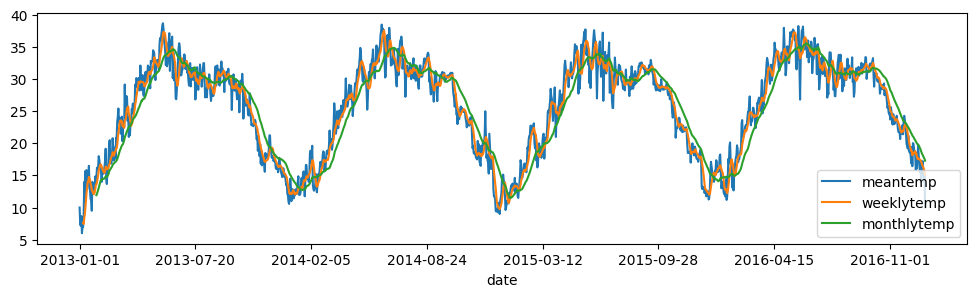

In [6]:
df[['meantemp', 'weeklytemp', 'monthlytemp']].plot(figsize=(12,3))
plt.show()

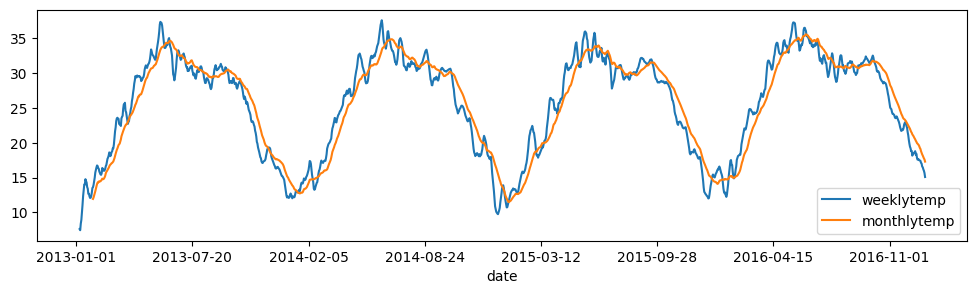

In [7]:
df[['weeklytemp', 'monthlytemp']].plot(figsize=(12,3))
plt.show()

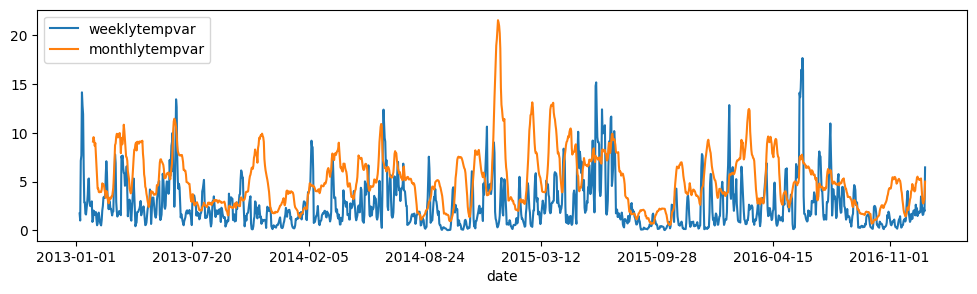

In [9]:
df['weeklytempvar'] = df['meantemp'].rolling(window=weekly).var()
df['monthlytempvar'] = df['meantemp'].rolling(window=monthly).var()
df[['weeklytempvar', 'monthlytempvar']].plot(figsize=(12,3))
plt.show()

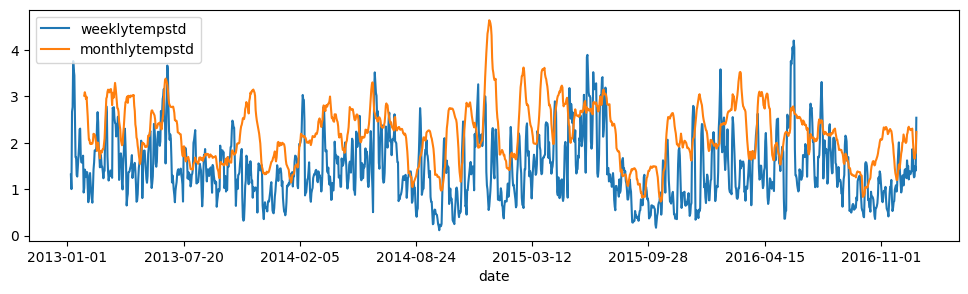

In [10]:
df['weeklytempstd'] = df['meantemp'].rolling(window=weekly).std()
df['monthlytempstd'] = df['meantemp'].rolling(window=monthly).std()
df[['weeklytempstd', 'monthlytempstd']].plot(figsize=(12,3))
plt.show()

#### 2. Exponential Weighted Moving Average (EWMA)
* The "ewm()" method is used for exponential weighted moving averages.
* It assigns exponentially decreasing weights to the observations.
* It's useful when recent observations are more relevant than older ones.  

In [13]:
alpha = 0.2

df['ewma'] = df['meantemp'].ewm(alpha=alpha, adjust=False).mean()
df.head()

,meantemp,humidity,wind_speed,meanpressure,weeklytemp,monthlytemp,weeklytempvar,monthlytempvar,weeklytempstd,monthlytempstd,ewma
date,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,9.480000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,NaN,NaN,9.017333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,NaN,NaN,NaN,NaN,8.947200
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,NaN,NaN,NaN,NaN,8.357760


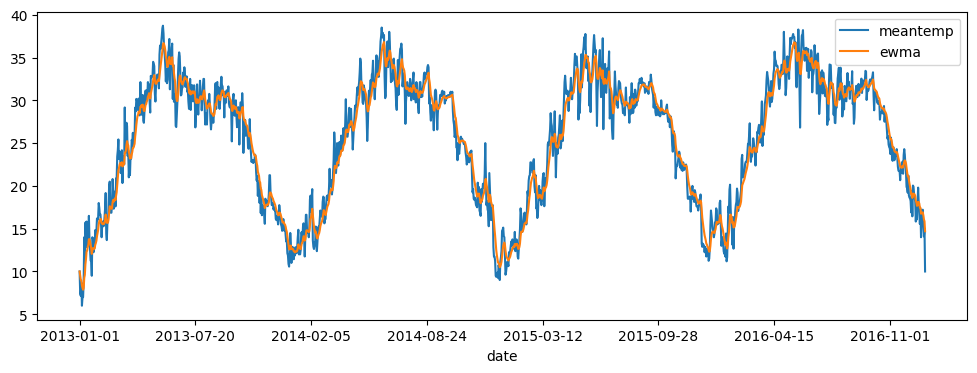

In [14]:
df[['meantemp', 'ewma']].plot(figsize=(12,4))
plt.show()

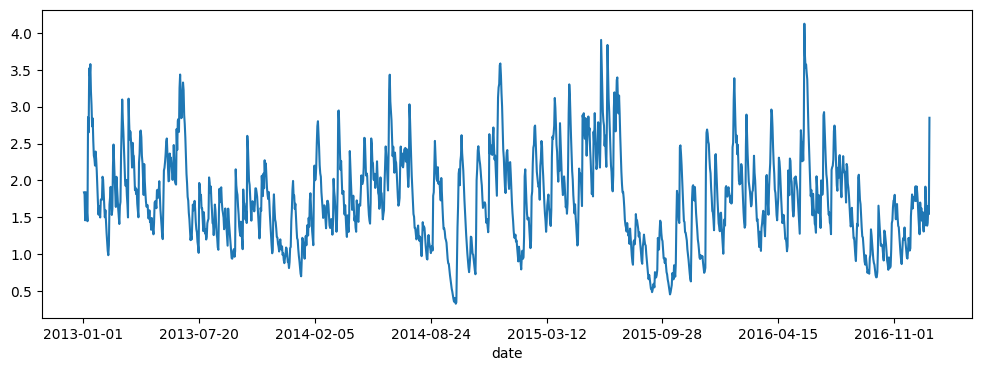

In [17]:
df['ewma'] = df['meantemp'].ewm(alpha=alpha, adjust=False).std()
df['ewma'].plot(figsize=(12,4))
plt.show()

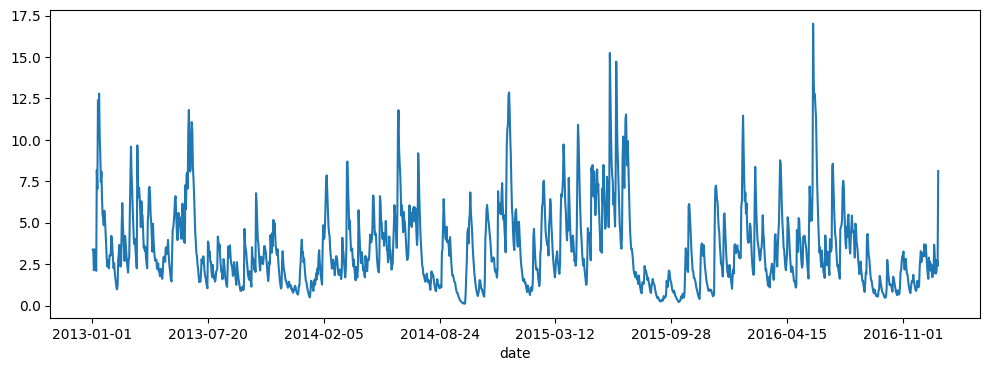

In [18]:
df['ewma'] = df['meantemp'].ewm(alpha=alpha, adjust=False).var()
df['ewma'].plot(figsize=(12,4))
plt.show()

#### 3. Cumulative Moving Average (CMA)
* The Cumulative Moving Average (CMA) is another technique for smoothing time series data.
* It involves calculating the average of all data points up to a given point in time.
* Pandas provides the expanding() function to perform cumulative calculations.

In [19]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,weeklytemp,monthlytemp,weeklytempvar,monthlytempvar,weeklytempstd,monthlytempstd,ewma
date,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,3.380000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,NaN,NaN,3.280339
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,NaN,NaN,NaN,NaN,2.129824
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.389313


In [20]:
df['cma'] = df['meantemp'].expanding().mean()
df.head()

,meantemp,humidity,wind_speed,meanpressure,weeklytemp,monthlytemp,weeklytempvar,monthlytempvar,weeklytempstd,monthlytempstd,ewma,cma
date,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,3.380000,8.700000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,NaN,NaN,3.280339,8.188889
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,NaN,NaN,NaN,NaN,2.129824,8.308333
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.389313,7.846667


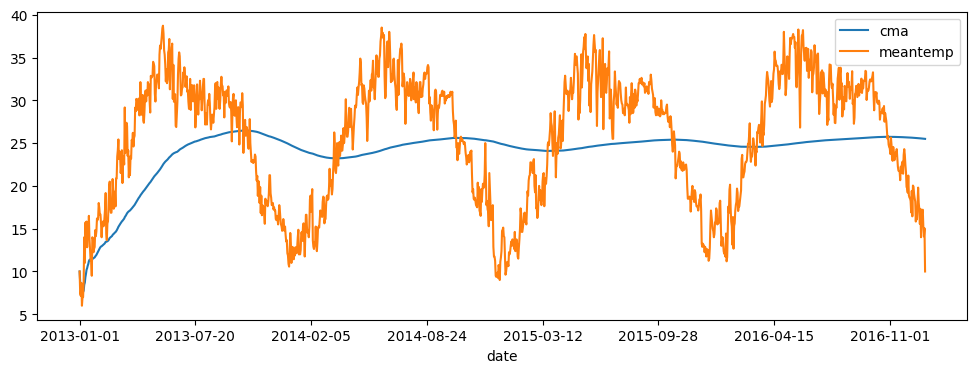

In [21]:
df[['cma', 'meantemp']].plot(figsize=(12,4))
plt.show()

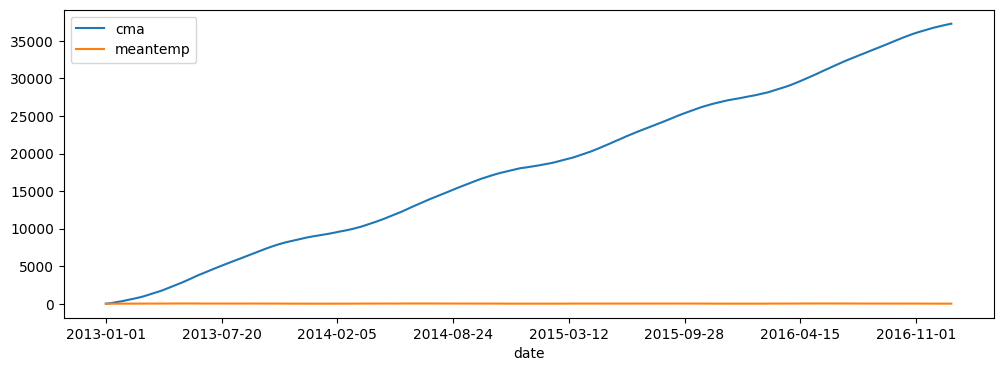

In [22]:
df['cma'] = df['meantemp'].expanding().sum()
df[['cma', 'meantemp']].plot(figsize=(12,4))
plt.show()

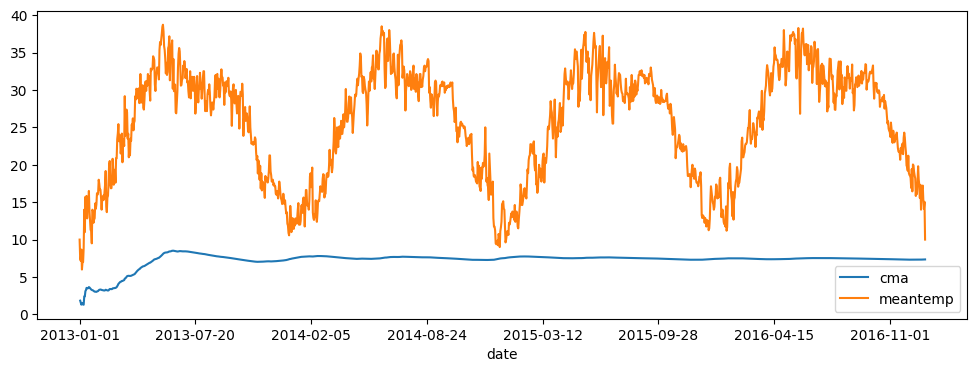

In [23]:
df['cma'] = df['meantemp'].expanding().std()
df[['cma', 'meantemp']].plot(figsize=(12,4))
plt.show()

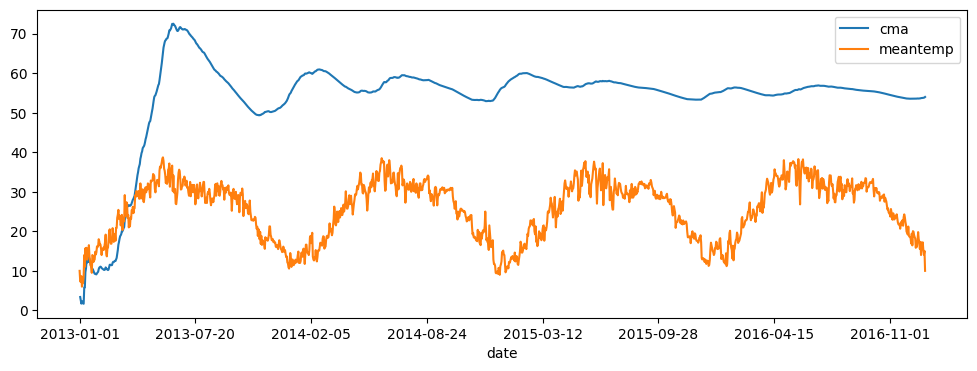

In [24]:
df['cma'] = df['meantemp'].expanding().var()
df[['cma', 'meantemp']].plot(figsize=(12,4))
plt.show()